In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


def visualise_angle_calc(traj_theta=np.pi, F=1, vx=1, vy=0, soln=0):
    fig = plt.figure()
    center = np.array([0, 0])
    dist = 1
    scale = 5
    traj_coords = dist*np.array([np.cos(traj_theta), np.sin(traj_theta)])
    flow_theta = math.atan2(vy, vx)
    # blue flow
    plt.quiver(0, 0, vx, vy, scale = scale, color='b')
    # grey traj
    plt.quiver(0, 0, 1.4*dist*np.cos(traj_theta), 1.4*dist*np.sin(traj_theta), color='k', alpha = 0.5,  scale = scale)
    # solution- action angle red
    plt.quiver(0,0, dist*np.cos(soln), dist*np.sin(soln), color = 'r',  scale = scale, alpha = 0.2)
    # net angle - green
    plt.quiver(0, 0, np.cos(soln) + vx, np.sin(soln) + vy, color = 'g', scale =scale, alpha = 0.2)
    
    

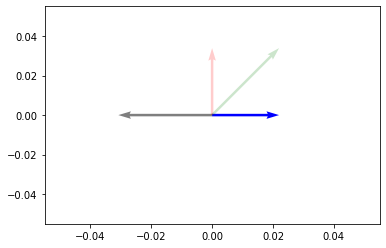

In [2]:
visualise_angle_calc(traj_theta=np.pi, F=1, vx=1 ,vy=0 ,soln=np.pi/2)

In [ ]:

F = 1
vx = 0.5
vy = 0
traj_theta = 3.9269908169872414
b = math.tan(traj_theta)
def solve_eqn_1(zz):
    func_val = (b * F * math.cos(zz)) - (F * math.sin(zz)) - vy + (b * vx)
    return func_val

zGuess = 6
z = fsolve(solve_eqn_1, zGuess)
print("z = ",z)
angle = z[0]
# if angle is negative, make it positive
while angle < 0:
    angle += 2*np.pi
angle
# denom = F * np.cos(angle) + vx
# Y = (( (F * np.sin(angle) + vy)/denom ) - b)
Y= (b * F * math.cos(angle)) - (F * math.sin(angle)) - vy + (b * vx)
print(angle, Y)
angle1 = angle+ np.pi
# denom = F * np.cos(angle1) + vx
# Y = (( (F * np.sin(angle1) + vy)/denom ) - b)
Y= (b * F * math.cos(angle1)) - (F * math.sin(angle1)) - vy + (b * vx)

print(angle1, Y)


In [ ]:
F = 1
vx = 0.5
vy = 0
traj_theta = 3.9269908169872414
b = math.tan(traj_theta)
angles = np.linspace(0,4*np.pi, 33)
Ys=[]
for angle in angles:
    Y= np.abs((b * F * math.cos(angle)) - (F * math.sin(angle)) - vy + (b * vx))
    Ys.append(Y)
plt.plot(angles,Ys)



In [ ]:
from scipy.optimize import fsolve
import math
import numpy as np

F = 1
vx = 0.5
vy = 0
traj_theta = 1.6


def solve_for_angle(F, vx, vy, traj_theta):
    if vx == 0 and vy == 0:
        return traj_theta
    b = math.tan(traj_theta)
    if traj_theta == np.pi/2:
        b = 1e308
    elif traj_theta == 3*np.pi/2:
        b = -1e308

    z = None
    print("traj_theta= ", traj_theta)

    def solve_eqn_1(zz):
        func_val = (b * F * math.cos(zz)) - (F * math.sin(zz)) - vy + (b * vx)
        return func_val

    zGuess = 0
    z = fsolve(solve_eqn_1, zGuess)
    angle = z[0]
    # if angle is negative, make it positive
    while angle < 0:
        angle += 2*np.pi
#     # if angle is grater than 2Pi, bring it beween [0, 2Pi]
#     angle = angle % (2 * np.pi)
# #     print("soln= ", angle)
    
    denom = F * np.cos(angle) + vx
    Y = (( (F * np.sin(angle) + vy)/denom ) - b)
    print("Y = ", Y)
    if np.abs(Y)>0.1 or np.abs(denom) < 1e-6:
        print("No solution!", np.abs(Y), np.abs(denom))
        angle = None
    
    
    
    
    return angle
    
traj_theta_list = np.pi*np.linspace(0,2,17)

for traj_theta in traj_theta_list:
    angle = solve_for_angle(F, vx, vy ,traj_theta)
    if angle != None:
        print("angle = ", angle)
        print()
        visualise_angle_calc(traj_theta=traj_theta, F=F, vx=vx ,vy=vy ,soln=angle)


In [ ]:
F = 1
vx = 1
vy = 0
soln_list = np.pi*np.linspace(0,2,17)
for soln in soln_list:
    visualise_angle_calc(traj_theta = 0, F =F, vx =vx, vy =vy, soln =soln)




















In [7]:
def calc_net_velocity(vx, vy, a):
    F, theta = a
    vy_net = F*math.sin(theta) + vy
    vx_net = F*math.cos(theta) + vx
    mag_v = (vx_net**2 + vy_net**2)**.5
    ang_v = get_angle_in_0_2pi(math.atan2(vy_net, vx_net))
    return (mag_v, ang_v)


def get_angle_in_0_2pi(angle):
    return (angle + 2 * np.pi) % (2 * np.pi)


def action_angle(traj_theta, actions, vx, vy, F):
    print()
    diff_list = []
    blocked_actions = []
    angle_list = []
    for idx in range(len(actions)):
        angle_list.append(actions[idx][1])
        (net_v_mag, net_v_angle) = calc_net_velocity(vx, vy, actions[idx])
        if net_v_mag < 0.001:
            blocked_actions.append(idx)
        diff_list.append(np.abs(traj_theta - net_v_angle))
    sorted_ids = np.argsort(diff_list)
    print("traj_theta", traj_theta)
    print("angle_list", angle_list)
    print("diff_list ", diff_list)
    print("sorted_ids ", sorted_ids)
    print("blocked_actions ", blocked_actions)
    min_id = None
    for idx in sorted_ids:
        if idx in blocked_actions:
            pass
        else:
            min_id = idx
            print("min_id =", min_id)
            break
    angle = actions[min_id][1]
    return angle

[(1, 0.0), (1, 0.39269908169872414), (1, 0.7853981633974483), (1, 1.1780972450961724), (1, 1.5707963267948966), (1, 1.9634954084936207), (1, 2.356194490192345), (1, 2.748893571891069), (1, 3.141592653589793), (1, 3.5342917352885173), (1, 3.9269908169872414), (1, 4.319689898685965), (1, 4.71238898038469), (1, 5.105088062083414), (1, 5.497787143782138), (1, 5.890486225480862)]
traj_theta, ac_angle, diff

traj_theta 0.0
angle_list [0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069, 3.141592653589793, 3.5342917352885173, 3.9269908169872414, 4.319689898685965, 4.71238898038469, 5.105088062083414, 5.497787143782138, 5.890486225480862]
diff_list  [0.0, 0.1963495408493623, 0.3926990816987246, 0.589048622548086, 0.7853981633974483, 0.9817477042468106, 1.178097245096172, 1.3744467859455343, 1.5707963267948966, 4.908738521234052, 5.105088062083413, 5.301437602932776, 5.497787143782138, 5.6941366846315, 5.

traj_theta 5.497787143782138
angle_list [0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069, 3.141592653589793, 3.5342917352885173, 3.9269908169872414, 4.319689898685965, 4.71238898038469, 5.105088062083414, 5.497787143782138, 5.890486225480862]
diff_list  [5.497787143782138, 5.301437602932776, 5.105088062083413, 4.908738521234052, 4.71238898038469, 4.516039439535327, 4.319689898685966, 4.123340357836604, 3.9269908169872414, 0.589048622548086, 0.3926990816987246, 0.1963495408493623, 0.0, 0.1963495408493623, 0.3926990816987237, 0.589048622548086]
sorted_ids  [12 11 13 14 10  9 15  8  7  6  5  4  3  2  1  0]
blocked_actions  [8]
min_id = 12

traj_theta 5.890486225480862
angle_list [0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069, 3.141592653589793, 3.5342917352885173, 3.9269908169872414, 4.31968989868596

[(0.0, 0.0, 0.0),
 (0.39269908169872414, 0.7853981633974483, 0.39269908169872414),
 (0.7853981633974483, 1.5707963267948966, 0.7853981633974483),
 (1.1780972450961724, 2.356194490192345, 1.1780972450961724),
 (1.5707963267948966, 2.748893571891069, 1.1780972450961724),
 (1.9634954084936207, 2.748893571891069, 0.7853981633974483),
 (2.356194490192345, 2.748893571891069, 0.39269908169872414),
 (2.748893571891069, 2.748893571891069, 0.0),
 (3.141592653589793, 2.748893571891069, 0.39269908169872414),
 (3.5342917352885173, 3.5342917352885173, 0.0),
 (3.9269908169872414, 3.5342917352885173, 0.39269908169872414),
 (4.319689898685965, 3.5342917352885173, 0.7853981633974478),
 (4.71238898038469, 3.5342917352885173, 1.1780972450961724),
 (5.105088062083414, 3.9269908169872414, 1.1780972450961729),
 (5.497787143782138, 4.71238898038469, 0.7853981633974483),
 (5.890486225480862, 5.497787143782138, 0.3926990816987237)]

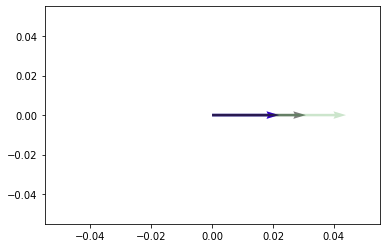

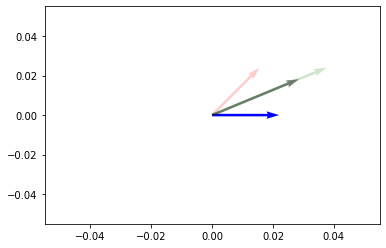

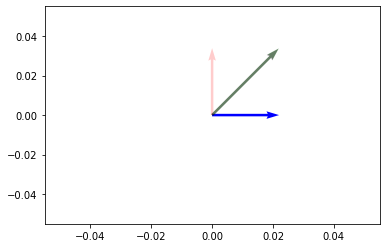

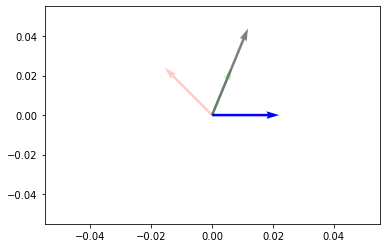

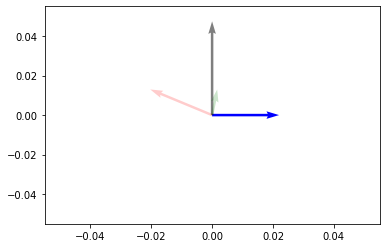

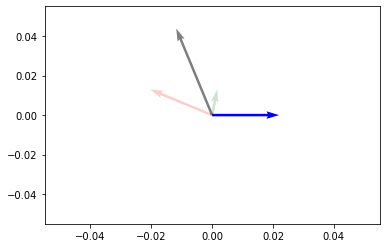

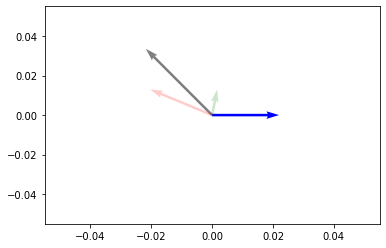

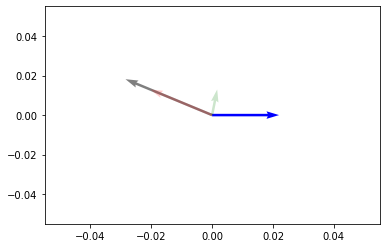

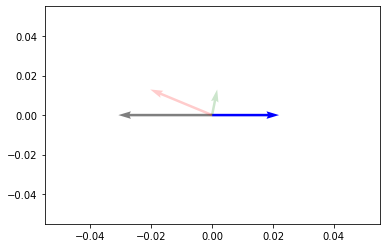

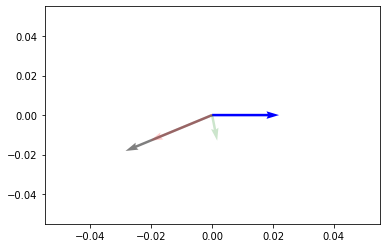

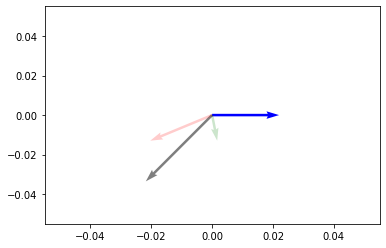

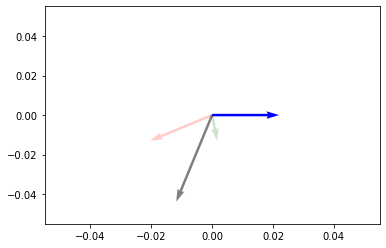

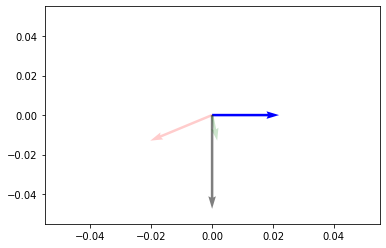

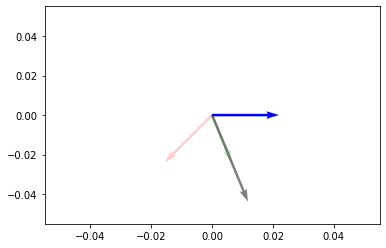

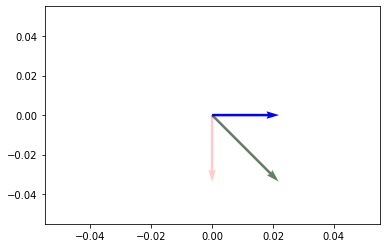

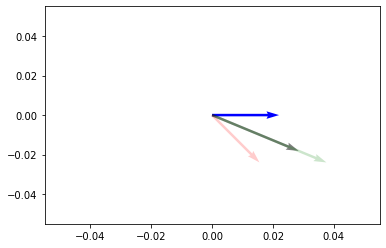

In [9]:
from scipy.optimize import fsolve
import math
import numpy as np
F = 1
vx = 1
vy = 0
traj_theta = np.pi
b = math.tan(traj_theta)
num_actions = 16
actions = [(F, i*2*np.pi / num_actions) for i in range(num_actions)]
print(actions)
traj_theta_list = np.linspace(0, 2*np.pi, num_actions, endpoint=False)
op_angle = []

# test for vx, vy =0 ::::: PASS for all theta_traj
print("traj_theta, ac_angle, diff")
for traj_theta in traj_theta_list:
    ac_angle = action_angle(traj_theta, actions, vx, vy, F)
    diff = np.abs(traj_theta - ac_angle)
    op_angle.append((traj_theta, ac_angle, diff))
    visualise_angle_calc(traj_theta=traj_theta, F=F, vx=vx ,vy=vy ,soln=ac_angle)
    
op_angle


In [ ]:
from scipy.optimize import fsolve
import math
import numpy as np
F = 1
vx = 1
vy = 0
traj_theta = np.pi
b = math.tan(traj_theta)
num_actions = 16
actions = [(F, i*2*np.pi / num_actions) for i in range(num_actions)]

traj_theta_list = np.linspace(0, 2*np.pi, num_actions, endpoint=False)
op_angle = []

# test for vx!= 0, vy =0 ::::: PASS for all theta_traj
for traj_theta in traj_theta_list:
    best_ac_angle = action_angle(traj_theta, actions, vx, vy, F)
    net_mag, net_angle = calc_net_velocity(vx, vy, (F, best_ac_angle))
    diff = traj_theta - net_angle
    op_angle.append((np.round(traj_theta, 3), np.round(
        best_ac_angle, 3), np.round(net_angle, 3), np.round(diff, 3)))
op_angle

In [20]:
def discretize( v, vs):
    """

    :param v: vx or vy from a cell from a particular realisation of the velocity field
    :param vs: list of vxs or vys- these are discrete possibilites of vxs or vys
    :return: closest vx/vy to v
    """
    if v>vs[-1]:
        return vs[-1]
    if v<vs[0]:
        return vs[0]
        
    del_vs = vs[1] - vs[0]
    id = int((v-vs[0])//del_vs)
    rem = v%del_vs
    if rem>del_vs/2:
        id +=1

    return vs[id]

In [26]:
vs = [0.2, 0.4, 0.6, 0.8]
v = 0.71

discretize(v,vs)

0.8